In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import csv
import math
import matplotlib.pyplot as plt

In [ ]:
!pip install python-louvain
import community.community_louvain as cl

In [ ]:
import community
import matplotlib.cm as cm

## Расчёт уровня инфраструктурной обеспеченности (F). Список критериев:
1. Обеспеченность местами в школах
2. Обеспеченность местами в дс
3. Наличие ФАП
4. Наличие банкомата
5. ...

F = a*x1 + b*x2 + c*x3...
где a, b, c... - коэффициент влияния направления (задаётся по желанию, в данном случае равны 1)
x - показатель

In [ ]:
# Чтение данных из файла или создание данных
data = pd.read_csv('infrastructure_3.csv', skiprows=[0], delimiter=';', names=['name','school','kindergarden','post','library','culture','atm','health','port','airport','shop'])

df_inf = pd.DataFrame(data)

# Нормализация данных

def normalize_columns(df_inf, columns=None):
    if not columns:
        columns = df_inf.columns[1:] # все колонки кроме первой

    for col in columns:
        max_value = float(df_inf[col].max())
        min_value = float(df_inf[col].min())

        df_inf[col] = (df_inf[col].astype('float') - min_value) / (max_value - min_value)
    return df_inf


# Нормализуем данные
normalized_df_inf = normalize_columns(df_inf)

# Суммируем нормализованные значения
summed_values = normalized_df_inf.iloc[:, 1:].sum(axis=1) #Все строки и колонки кроме первых

# Добавляем итоговую сумму к исходному DataFrame
result_df_inf = df_inf.copy()
result_df_inf['ind'] = summed_values

result_df_inf = result_df_inf[[result_df_inf.columns[0], result_df_inf.columns[-1]]] #Выбираем только столбцы с названием и итоговой оценкой

df_towns = pd.read_csv('main_towns3.csv', delimiter = ';') #Читаем файл с опорными городами
combined_df = pd.concat([result_df_inf, df_towns])

combined_df.sort_values(by='ind', ascending=False)

,name,ind
1,Магадан,12.000000
0,Якутск,12.000000
13,Среднеколымск,8.166667
23,Билибино,7.742424
5,Черский,7.575758
7,Колымское,6.045455
4,Омолон,5.712121
3,Анюйск,5.712121
18,Эбях,5.500000
12,Походск,5.166667


Расчёт функции времени (T). Виды транспорта:
1. Автомобильный (car)
2. Авиационный (plane)
3. Водный_теплоход (water_ship)
4. Водный_личный (water_boat)
5. Зимний (winter)

2 времени года лето (warm), зима (cold). Для каждого отдельный расчёт. Коэффициенты риска меняются (задаются самостоятельно, отдельно для каждого эксперимента)

T = t * an
an - коэффициент риска транспорта (ratio)


## **Расчёт тёплого времени года**

In [ ]:
#Данные на всякий случай сохранить в кодировке utf-8 (через блокнот)
car_ratio=1.1
plane_ratio=1.2
water_ship_ratio=1.2
water_boat_ratio=1.3

# Чтение данных из CSV-файлаw
df = pd.read_csv("warm_time_3.csv", delimiter=';', names=['depart','arrival','car','plane','water_ship','water_boat']) #Перед этим в экселе установить числовой формат и убрвть первую строку с названиями столбцов

#Замена , на .
df['car'] = df['car'].apply(lambda x: x.replace(',', '.')).astype('float')
df['plane'] = df['plane'].apply(lambda x: x.replace(',', '.')).astype('float')
df['water_ship'] = df['water_ship'].apply(lambda x: x.replace(',', '.')).astype('float')
df['water_boat'] = df['water_boat'].apply(lambda x: x.replace(',', '.')).astype('float')
print(df)

#Умножение по столбцам на коэффициенты риска
df['car'] = df['car'].apply(lambda x: car_ratio*x)
df['plane'] = df['plane'].apply(lambda x: plane_ratio*x)
df['water_ship'] = df['water_ship'].apply(lambda x: water_ship_ratio*x)
df['water_boat'] = df['water_boat'].apply(lambda x: water_boat_ratio*x)

           depart        arrival     car  plane  water_ship  water_boat
0          Анюйск       Билибино   4.317  0.000         0.0       0.000
1          Анюйск      Две Виски   0.000  0.000         0.0       3.560
2          Анюйск       Ермолово   0.000  0.000         0.0       3.700
3          Анюйск      Кепервеем   4.383  1.000         0.0       0.000
4          Анюйск      Колымское   0.000  0.000         0.0       7.130
5          Анюйск      Михалкино   0.000  0.000         0.0       7.047
6          Анюйск   Нижнеколымск   0.000  0.000         0.0       3.000
7          Анюйск         Омолон  12.500  0.000         0.0       0.000
8          Анюйск      Островное   3.760  0.560         0.0       0.000
9          Анюйск        Походск   0.000  0.000         0.0       6.053
10         Анюйск        Черский   1.150  0.000         0.0       4.400
11      Две Виски      Михалкино   0.000  0.000         0.0       4.884
12      Две Виски        Походск   0.000  0.000         0.0     

In [ ]:
# Чтение данных из файла
df_time = df

# Получение минимальных значений, игнорируя 0 и первые два столбца
results = df.iloc[:, 2:].replace(0, np.nan).apply(lambda x: x.min(), axis=1)

#Сохранение результатов в таблицу
new_df = df_time.copy()
new_df['min'] = results

#Выбор столбцов с названием н.п. и минимальным временем
min_time_warm = new_df[['depart', 'arrival','min']]

#Заполнение пустых строк нулями
min_time_warm['min'] = min_time_warm['min'].fillna(0)

<ipython-input-9-8bd07da5eece>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_time_warm['min'] = min_time_warm['min'].fillna(0)


## Расчёт гравитационной силы (G)

In [ ]:
# Копируем датафрейм в новый датафрейм
combined_df_deleted = combined_df.copy()
min_time_warm_deleted = min_time_warm.copy()
# Определяем список названий деревень, которые нужно удалить
villages_to_remove = ['Черский', 'Анюйск', 'Среднеколымск']

# Удаляем строки, где значение в колонке 'name' совпадает с одним из значений списка villages_to_remove
index_to_drop = combined_df_deleted['name'].isin(villages_to_remove)
combined_df_deleted = combined_df_deleted[~index_to_drop]

# Удаляем строки из min_time_warm_new, где значения в колонках 'depart' или 'arrival' совпадают с одним из значений списка villages_to_remove
index_to_drop_depart = min_time_warm_deleted['depart'].isin(villages_to_remove)
index_to_drop_arrival = min_time_warm_deleted['arrival'].isin(villages_to_remove)
min_time_warm_deleted = min_time_warm_deleted[~(index_to_drop_depart | index_to_drop_arrival)]

combined_df_deleted # Выводим результат

,name,ind
0,Кепервеем,4.333333
1,Илирней,4.666667
2,Островное,4.833333
4,Омолон,5.712121
6,Нижнеколымск,1.000000
7,Колымское,6.045455
8,Андрюшкино,5.000000
9,Две Виски,1.000000
10,Ермолово,1.000000
11,Михалкино,1.000000


In [ ]:
#Чтение файлов с уровнем инфраструктурной обеспеченности и данными по времени
settl_deleted = dict(zip(combined_df_deleted['name'], combined_df_deleted['ind']))
connect_deleted = min_time_warm_deleted.values.tolist()

# Преобразование данных и вычисление
G_deleted = []
for row in connect_deleted:
    try:
        F1 = float(settl_deleted[row[0]])
        F2 = float(settl_deleted[row[1]])
        r = float(row[2])
        if r == 0:
            LocalGravity = 0
        else:
            LocalGravity = (F1 - F2) / (r ** 2)  # Убрать модуль, чтобы граф стал направленным, тогда можно анализировать что к чему притягивается
        G_deleted.append([row[0], row[1], LocalGravity])
    except KeyError:
        continue  # Пропускаем строки, если ключ не найден

#Сохранение данных в файл csv
local_gravity_deleted = pd.DataFrame(G_deleted, columns=['settl1', 'settl2','LocalGravity'])
#local_gravity.to_csv('Local_gravity_warm_3_deleted.csv', sep=';', index=False)
#print(local_gravity_deleted)

In [ ]:
# Функция для обработки строк
def process_row(row):
    if row['LocalGravity'] < 0:
        # Меняем города местами и делаем значение положительным
        row['settl1'], row['settl2'] = row['settl2'], row['settl1']
        row['LocalGravity'] = abs(row['LocalGravity'])
    return row

#Нормирование значений
def normalize_column_and_sort_descending(df_norm, column_name):
    # Получаем минимальное и максимальное значения в колонке
    min_value = df_norm[column_name].min()
    max_value = df_norm[column_name].max()

    # Нормализуем значения от 0 до 100
    df_norm[column_name] = ((df_norm[column_name] - min_value) / (max_value - min_value)) * 100

    # Сортируем таблицу по нормализованному столбцу в порядке убывания
    df_norm.sort_values(by=column_name, ascending=False, inplace=True)

    return df_norm

In [ ]:
df_row_deleted = local_gravity_deleted
# Применяем функцию ко всем строкам
df_row_deleted = df_row_deleted.apply(process_row, axis=1)
#Нормирование значений
df_norm_deleted = df_row_deleted
sorted_normalized_df_deleted = normalize_column_and_sort_descending(df_norm_deleted, 'LocalGravity')
#print(sorted_normalized_df_deleted)

Empty DataFrame
Columns: [settl1, settl2, LocalGravity]
Index: []


## Создание графа и его анализ

### Граф по G

In [ ]:
# Чтение данных
data_graph = sorted_normalized_df_deleted

# Создание направленного графа
G = nx.DiGraph()
# Проверить имена столбцов
print(data_graph.columns)
G

Index(['settl1', 'settl2', 'LocalGravity'], dtype='object')


['Кепервеем', 'Билибино', 'Островное', 'Илирней', 'Магадан', 'Нижнеколымск', 'Походск', 'Омолон', 'Ермолово', 'Колымское', 'Две Виски', 'Михалкино']
12


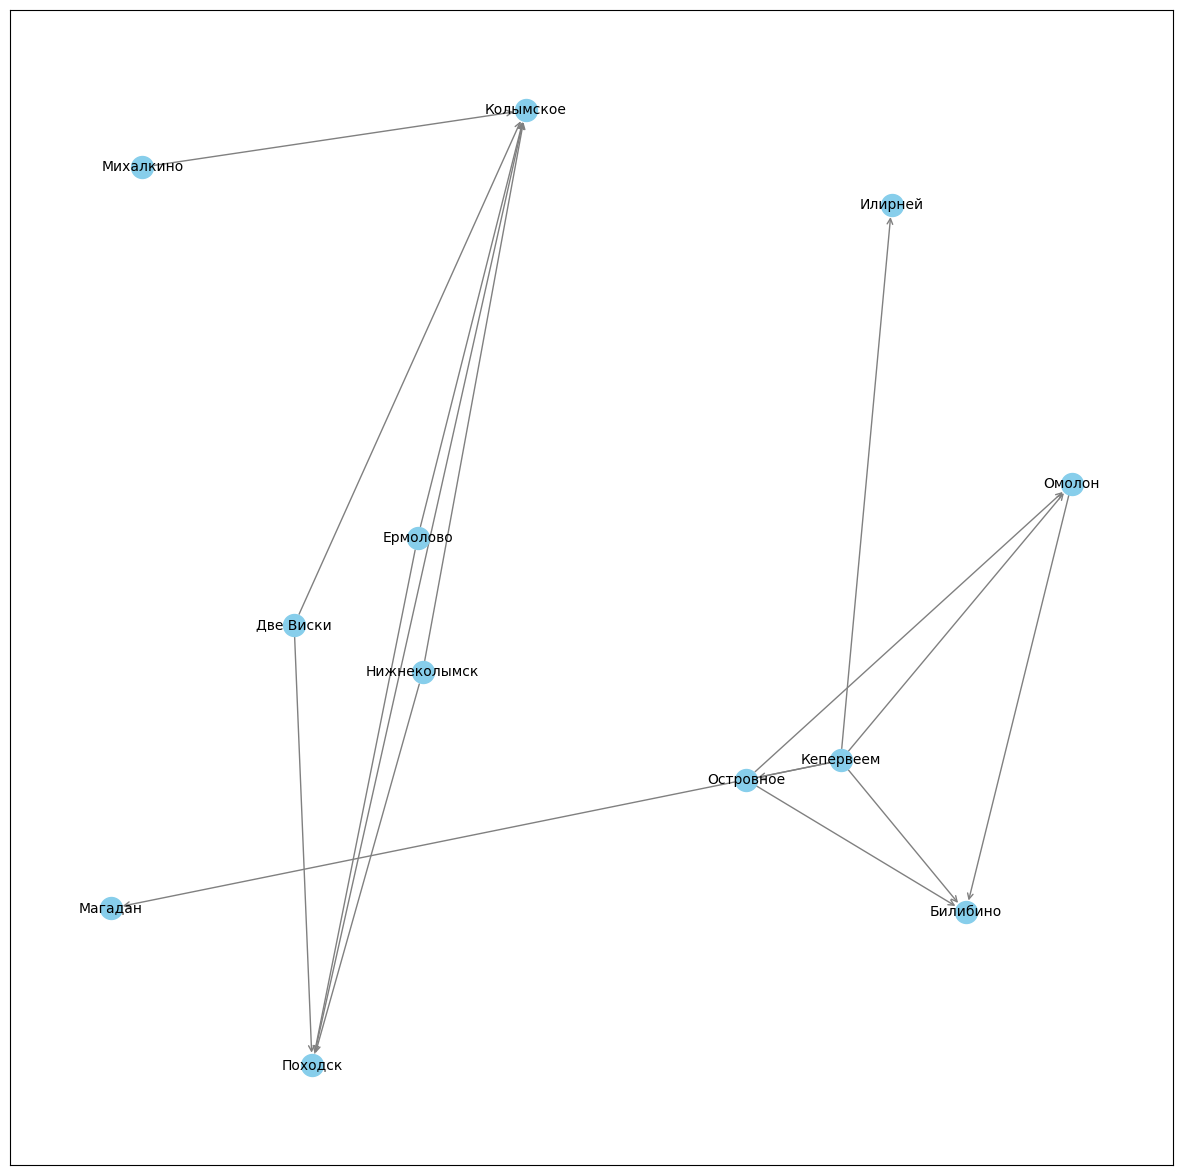

In [ ]:
for _, row in data_graph.iterrows():
    source = row['settl2']  # Начальная вершина
    target = row['settl1']  # Конечная вершина
    gravity_force = row['LocalGravity']

    # Проверяем, чтобы гравитационная сила была ненулевой
    if gravity_force != 0:
        G.add_edge(source, target, weight=gravity_force)

# Настройка параметров для визуализации
pos = nx.spring_layout(G, k=1, scale=3)  # Расположение узлов
#edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}  # Метки для рёбер
plt.figure(figsize=(15,15))  # Размер графика
nx.draw_networkx_nodes(G, pos, node_size=250, node_color='skyblue')  # Узлы
nx.draw_networkx_edges(G, pos, edge_color='gray', arrowstyle='->', arrows=True)  # Рёбра
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')  # Метки узлов
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)  # Метки рёбер

plt.savefig("G_warm_3_deleted.png")
print(list(G.nodes))
# Получаем количество узлов
print(G.number_of_nodes())

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
# Получение списка всех узлов
all_nodes = list(G.nodes())
# Подсчет количества входящих рёбер для каждого узла
incoming_counts = {}
for node in all_nodes:
    incoming_count = len(list(G.predecessors(node)))
    incoming_counts[node] = incoming_count

# Получение топ-10 узлов с наибольшим количеством входящих рёбер
top_10_nodes = Counter(incoming_counts).most_common(10)

# Печать результата
for node, count in top_10_nodes:
    print(f"{node}: {count}")

Колымское: 5
Билибино: 3
Походск: 3
Омолон: 2
Островное: 1
Илирней: 1
Магадан: 1
Кепервеем: 0
Нижнеколымск: 0
Ермолово: 0


### Граф по Т

22
['Анюйск', 'Билибино', 'Две Виски', 'Ермолово', 'Колымское', 'Михалкино', 'Нижнеколымск', 'Омолон', 'Островное', 'Походск', 'Черский', 'Среднеколымск', 'Алеко-Кюёль', 'Аргахтах', 'Берёзовка', 'Ойусардах', 'Сватай', 'Сылгы-Ытар', 'Хатынгнах', 'Эбях', 'Андрюшкино', 'Якутск']


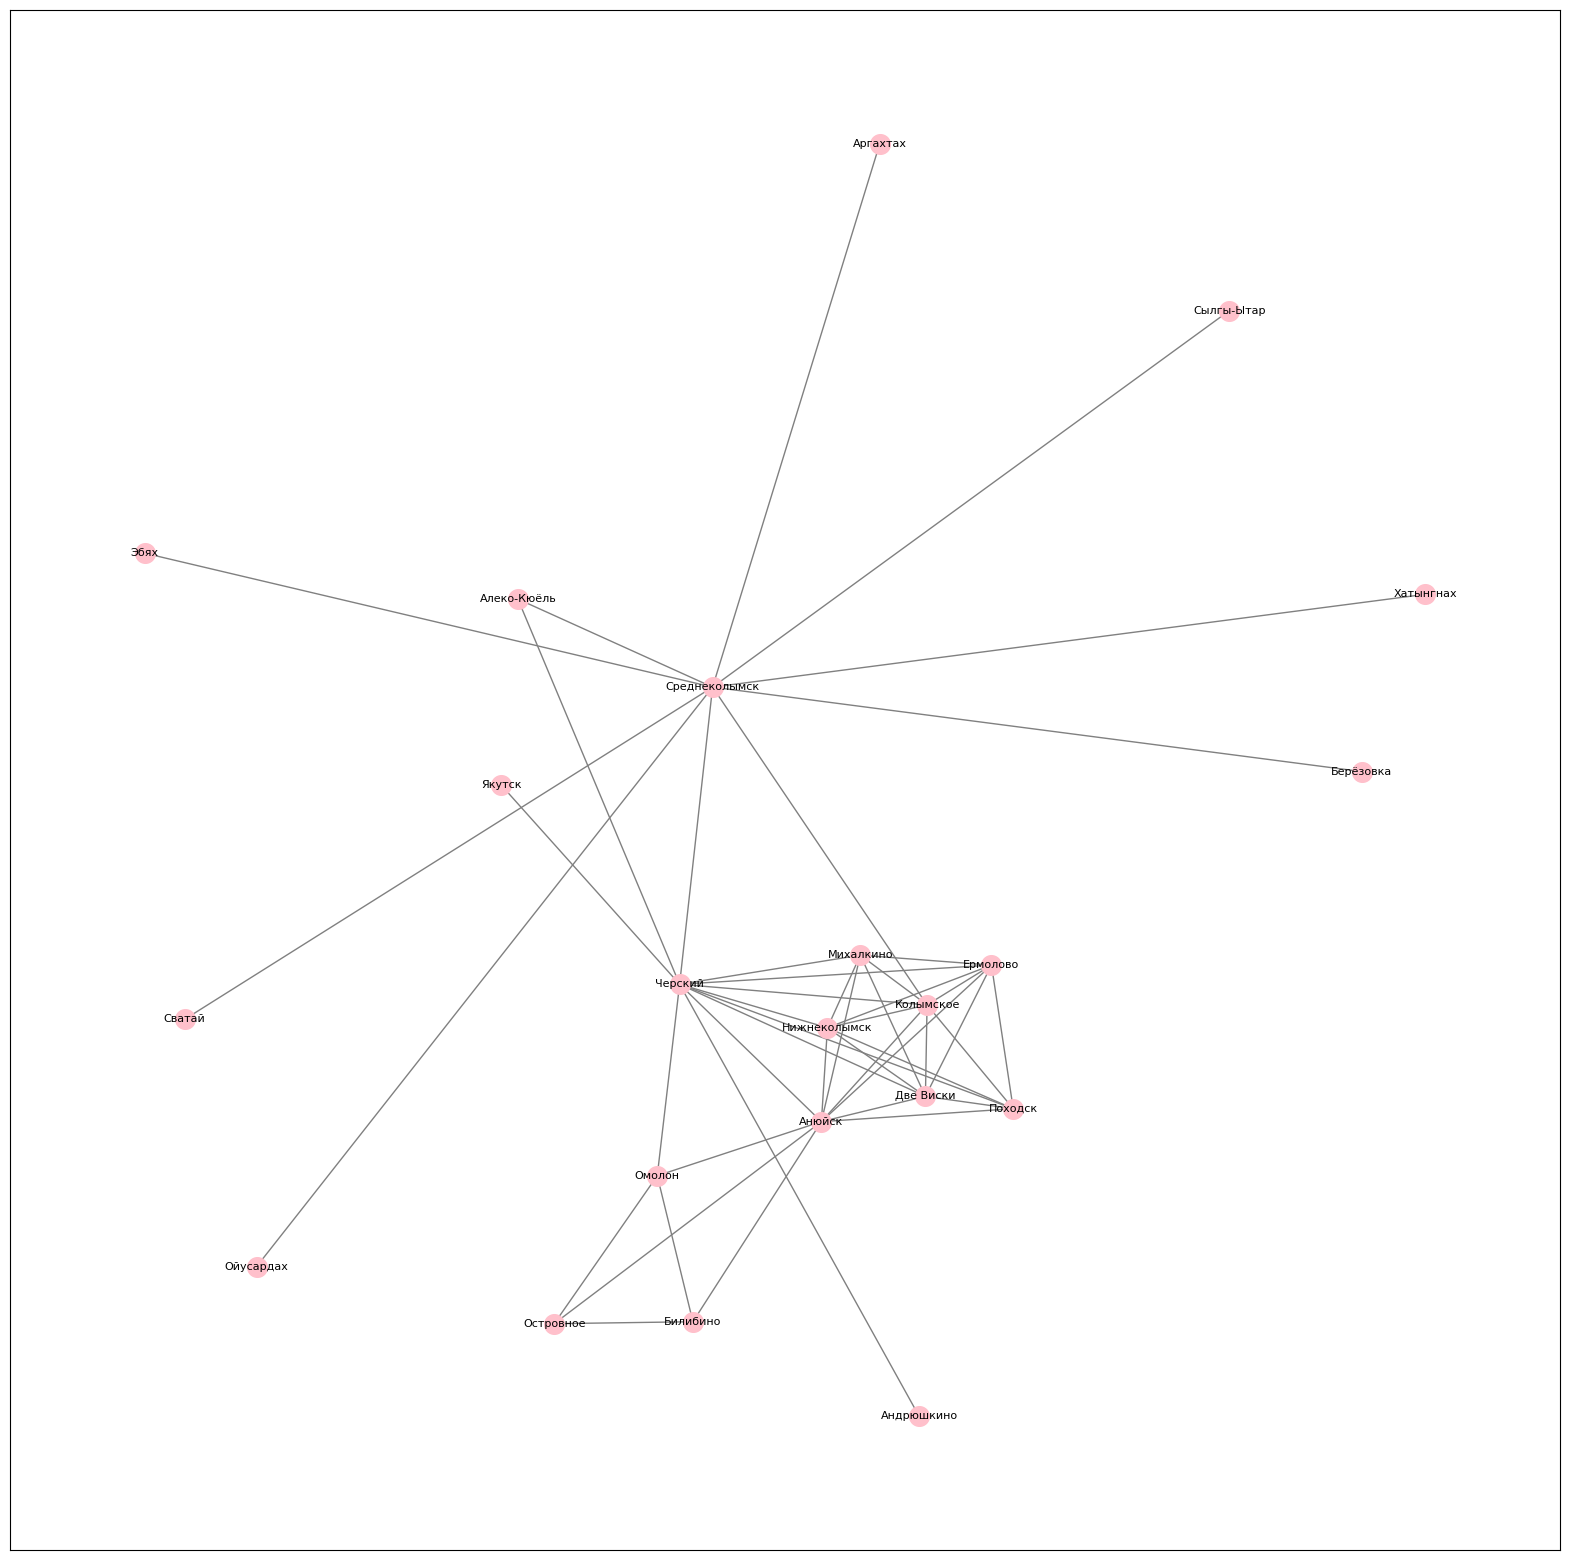

In [ ]:
# Чтение данных из CSV-файла
data_graph_time = min_time_warm_deleted

# Создаем пустой ненаправленный граф
G_time = nx.Graph()
for _, row in data_graph_time.iterrows():
    settl1 = row['depart']
    settl2 = row['arrival']
    time = row['min']

    # Если время между деревнями не равно нулю, добавляем ребро
    if time != 0:
        G_time.add_edge(settl1, settl2, weight=time)

# Настройка параметров для визуализации
pos_time = nx.spring_layout(G_time, k=1, scale=4)  # Расположение узлов
#edge_labels_time = {(u, v): d['weight'] for u, v, d in G_time.edges(data=True)}  # Метки для рёбер
G_time
plt.figure(figsize=(20,20))  # Размер графика
nx.draw_networkx_nodes(G_time, pos_time, node_size=200, node_color='pink')  # Узлы
nx.draw_networkx_edges(G_time, pos_time, edge_color='gray')  # Рёбра
nx.draw_networkx_labels(G_time, pos_time, font_size=8, font_family='sans-serif')  # Метки узлов
#nx.draw_networkx_edge_labels(G_time, pos_time, edge_labels=edge_labels, font_size=10)  # Метки рёбер

print(G_time.number_of_nodes())

print(list(G_time.nodes))
plt.savefig("T_warm_2_deleted.png")

### Анализ графа

### Анализ кластеров

In [ ]:
data_graph_G = sorted_normalized_df_deleted
# Создание ненаправленного графа
G_undirect = nx.Graph()

for _, row in data_graph_G.iterrows():
    vertex1 = row['settl1']  # Первая вершина
    vertex2 = row['settl2']  # Вторая вершина
    gravity_force = row['LocalGravity']

    # Проверяем, чтобы гравитационная сила была ненулевой
    if gravity_force != 0:
        G_undirect.add_edge(vertex1, vertex2, weight=gravity_force)

### Обратный граф

In [ ]:
import pandas as pd
# Функция для обработки значений
def  gravity_reverse(x):
    if x == 0:
        return 0
    else:
        return 1 / x

# Применяем функцию к столбцу 'Цена'
df_reverse = sorted_normalized_df_deleted.copy()
df_reverse['reverse_gravity'] = df_reverse['LocalGravity'].apply(gravity_reverse)

columns_to_drop = ['LocalGravity']
df_reverse.drop(columns_to_drop, axis=1, inplace=True)
#df_reverse.sort_values(by='reverse_gravity', ascending=False)

In [ ]:
#Граф с обратным G (то есть 1/G)
data_reverse = df_reverse
# Создание направленного графа
G_reverse = nx.DiGraph()
for _, row in data_reverse.iterrows():
    source = row['settl2']  # Начальная вершина
    target = row['settl1']  # Конечная вершина
    gravity_force = row['reverse_gravity']

    # Проверяем, чтобы гравитационная сила была ненулевой
    if gravity_force != 0:
        G_reverse.add_edge(source, target, weight=gravity_force)

### Кластеризация

In [ ]:
# Выполнение модулярной кластеризации. мера качества разбиения графа на сообщества. Она позволяет находить группы узлов, внутри которых связи сильнее, чем снаружи.
partition = cl.best_partition(G_undirect)
mod = cl.modularity(partition, G_undirect)

print("Модулярность:", mod)

# Распечатка сообществ
communities = {}
for node, com_id in partition.items():
    if com_id not in communities:
        communities[com_id] = []
    communities[com_id].append(node)

for com_id, nodes in communities.items():
    print(f"Сообщество {com_id + 1}: {', '.join(nodes)}")

from networkx.algorithms.centrality import degree_centrality

communities = partition.values()
community_centers = {}

for comm_id in set(communities):
    nodes_in_comm = [node for node, c in partition.items() if c == comm_id]
    degrees = {node: G_undirect.degree(node) for node in nodes_in_comm}
    center = max(degrees, key=degrees.get)
    community_centers[comm_id] = center
print("Центры сообществ:", community_centers)

Модулярность: 0.4587457493537608
Сообщество 2: Черский, Походск, Колымское, Нижнеколымск, Ермолово, Андрюшкино, Две Виски, Михалкино, Якутск
Сообщество 3: Среднеколымск, Хатынгнах, Сылгы-Ытар, Ойусардах, Сватай, Аргахтах, Берёзовка, Алеко-Кюёль, Эбях
Сообщество 1: Анюйск, Островное, Билибино, Омолон
Центры сообществ: {0: 'Анюйск', 1: 'Черский', 2: 'Среднеколымск'}


### Выявление частовстречаемых поселений

In [ ]:
# Расчёт степенной центральности
degree = nx.degree_centrality(G)

# Сортируем населённые пункты по уменьшению степенной центральности
sorted_centralities = sorted(degree.items(), key=lambda x: x[1], reverse=True)

# Вывод результатов
for node, centrality in sorted_centralities:
    print(f"{node}: {centrality:.4f}")

Черский: 0.5714
Среднеколымск: 0.4762
Анюйск: 0.4762
Колымское: 0.3810
Походск: 0.2857
Нижнеколымск: 0.1905
Ермолово: 0.1905
Две Виски: 0.1905
Омолон: 0.1905
Островное: 0.1429
Билибино: 0.1429
Михалкино: 0.1429
Алеко-Кюёль: 0.0952
Хатынгнах: 0.0476
Сылгы-Ытар: 0.0476
Ойусардах: 0.0476
Сватай: 0.0476
Аргахтах: 0.0476
Берёзовка: 0.0476
Эбях: 0.0476
Андрюшкино: 0.0476
Якутск: 0.0476


In [ ]:
#Вершины на концах мостов. Критичны для удаления
bridges = list(nx.bridges(G_undirect))
bridge_nodes = set([u for u, _ in bridges] + [v for _, v in bridges])
print(bridge_nodes)

{'Сватай', 'Якутск', 'Хатынгнах', 'Ойусардах', 'Сылгы-Ытар', 'Черский', 'Андрюшкино', 'Эбях', 'Аргахтах', 'Среднеколымск', 'Берёзовка'}


In [ ]:
# Вычисляем промежуточную центральность для каждого узла. Центральность по промежуточности, показывает, насколько часто узел находится на кратчайших путях между другими узлами графа
bc = nx.betweenness_centrality(G_reverse, normalized=False)
sorted_bc = sorted(bc.items(), key=lambda item: item[1], reverse=True)
important_nodes_bc = [k for k, v in sorted_bc[:7]]
print(important_nodes_bc)

['Черский', 'Анюйск', 'Колымское', 'Омолон', 'Походск', 'Хатынгнах', 'Среднеколымск']


In [ ]:
#Центральность по близости, показывает, насколько быстро можно достичь всех других узлов графа из данного узла. Можно оценить, насколько населенный пункт является "опорным" с точки зрения доступности остальных точек
cc = nx.closeness_centrality(G_reverse)
sorted_cc = sorted(cc.items(), key=lambda item: item[1], reverse=True)
important_nodes_cc = [k for k, v in sorted_cc[:7]]
print(important_nodes_cc)

['Среднеколымск', 'Черский', 'Колымское', 'Анюйск', 'Якутск', 'Билибино', 'Омолон']


In [ ]:
from collections import Counter
def sort_nodes_by_frequency(degree_centrality, closeness_centrality, betweenness_centrality, bridge_endpoints):
    # Преобразуем множества в списки, если они таковыми являются
    if isinstance(degree_centrality, set):
        degree_centrality = list(degree_centrality)
    if isinstance(closeness_centrality, set):
        closeness_centrality = list(closeness_centrality)
    if isinstance(betweenness_centrality, set):
        betweenness_centrality = list(betweenness_centrality)
    if isinstance(bridge_endpoints, set):
        bridge_endpoints = list(bridge_endpoints)

    # Объединяем все списки узлов в один большой список
    all_nodes = degree_centrality + closeness_centrality + betweenness_centrality + bridge_endpoints

    # Подсчитываем частоту встречаемости каждого узла
    node_counts = Counter(all_nodes)

    # Сортируем узлы по убыванию частоты
    sorted_nodes = sorted(node_counts.items(), key=lambda x: (-x[1], x[0]))

    return sorted_nodes

sorted_list = sort_nodes_by_frequency(hubs, important_nodes_cc, important_nodes_bc, bridge_nodes)
print(sorted_list)

[('Среднеколымск', 4), ('Черский', 4), ('Анюйск', 3), ('Колымское', 3), ('Омолон', 2), ('Походск', 2), ('Хатынгнах', 2), ('Якутск', 2), ('Андрюшкино', 1), ('Аргахтах', 1), ('Берёзовка', 1), ('Билибино', 1), ('Ермолово', 1), ('Нижнеколымск', 1), ('Ойусардах', 1), ('Сватай', 1), ('Сылгы-Ытар', 1), ('Эбях', 1)]


### Поиск минимального остовного дерева (толька на ненаправленных графах)

In [ ]:
# Находим минимальное остовное дерево с помощью алгоритма Буровка
MST = nx.minimum_spanning_tree(G_time, algorithm='boruvka')

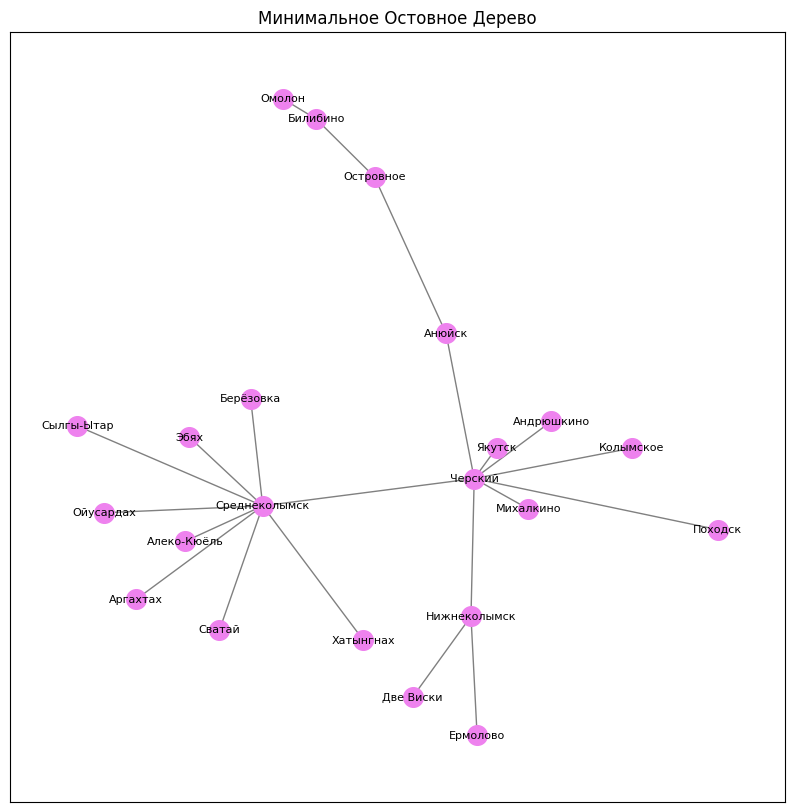

In [ ]:
# Визуализация минимального остовного дерева
pos_MST = nx.spring_layout(MST)  # Расположение вершин
labels = nx.get_edge_attributes(MST, 'weight')  # Вес каждого ребра
plt.figure(figsize=(10, 10))  # Размер графика
# Настройка параметров для визуализации
pos_MST = nx.spring_layout(MST)  # Расположение узлов
nx.draw_networkx_nodes(MST, pos_MST, node_size=200, node_color='violet')  # Узлы
nx.draw_networkx_edges(MST, pos_MST, edge_color='gray')  # Рёбра
nx.draw_networkx_labels(MST, pos_MST, font_size=8, font_family='sans-serif')  # Метки узлов
#nx.draw_networkx_edge_labels(MST, pos_MST, edge_labels=edge_labels, font_size=10)  # Метки рёбер

plt.title('Минимальное Остовное Дерево')
plt.show()

### Определение узлов-стоков и узлов-источников

In [ ]:
#Определение узлов без входящих/исходящих рёбер (только для направленных графов)
def find_sources_and_sinks(G):
    sources = []
    sinks = []

    # Проверяем каждую вершину
    for node in G.nodes():
        has_incoming_edge = False
        has_outgoing_edge = False

        # Проверка наличия входящих рёбер
        for other_node in G.predecessors(node):
            has_incoming_edge = True
            break

        # Проверка наличия исходящих рёбер
        if len(list(G.successors(node))) > 0:
            has_outgoing_edge = True

        # Добавляем вершину в соответствующий список
        if not has_incoming_edge:
            sources.append(node)
        if not has_outgoing_edge:
            sinks.append(node)

    return sources, sinks

# Получение результатов
sources, sinks = find_sources_and_sinks(G)
print("Sources:", sources)
print("Sinks:", sinks)

Sources: ['Хатынгнах', 'Сылгы-Ытар', 'Ойусардах', 'Сватай', 'Аргахтах', 'Берёзовка', 'Алеко-Кюёль', 'Эбях', 'Нижнеколымск', 'Островное', 'Ермолово', 'Андрюшкино', 'Две Виски', 'Михалкино']
Sinks: ['Среднеколымск', 'Билибино', 'Якутск']
